In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#define function
F = lambda p: (p[0]**2 + p[1] - 11)**2 + (p[0] + p[1]**2 - 7)**2
#define gradient function
f = lambda p: np.array([[2 * (p[0]**2 + p[1] - 11)*2*p[0] + 2*(p[0] + p[1]**2 - 7)][0],[2*(p[0]**2 + p[1] - 11) + 2*(p[0]+p[1]**2-7)*2*p[1]][0]])

def gradient_descent(point, step_size, max_iterations):
    path = np.array([point])
    grad = f(point)
    i = 0
    while i < max_iterations and np.linalg.norm(grad)>=10**-12:
        point = point - step_size*grad
        path = np.append(path, point)
        grad = f(point)
        #print(grad)
        #print(np.linalg.norm(grad))
        i = i+1
    if i<max_iterations:
        print("Iterations: ", i)
        print("Minimum point: ", point)
        print("Gradient: ", grad)
        print("Gradient Norm: ", np.linalg.norm(grad))
        print("Function value: ", F(point))
    else:
        print("Max iterations exceeded")
        print(i)
    return path

In [3]:
_ = gradient_descent(np.array([[0],[-4]]), 0.005, 10000)
_ = gradient_descent(np.array([[0],[-4]]), 0.01, 10000)
#We observe that using a larger step size allows us to find convergence more quickly. We are careful, however, since we note that larger step size results in courser results which may skip over better points that could be found by a smaller step size.


Iterations:  93
Minimum point:  [[-3.77931025]
 [-3.28318599]]
Gradient:  [[4.50239066e-13]
 [6.71903079e-13]]
Gradient Norm:  8.08807124019088e-13
Function value:  [4.6227249e-27]
Iterations:  38
Minimum point:  [[-3.77931025]
 [-3.28318599]]
Gradient:  [[9.36201269e-14]
 [4.21924070e-13]]
Gradient Norm:  4.3218589597923125e-13
Function value:  [1.25271112e-27]


In [4]:
p1 = gradient_descent(np.array([[0],[-4]]), 0.01, 10000)
p2 = gradient_descent(np.array([[0.5],[-4]]), 0.01, 10000)
p3 = gradient_descent(np.array([[0],[4]]), 0.01, 10000)
p4 = gradient_descent(np.array([[0.5],[4]]), 0.01, 10000)
#All the solutions are not the same.
#We can clearly see that these solutions are local minima since we see variance up to a factor of 10 in the funciton values for the solutions.

Iterations:  38
Minimum point:  [[-3.77931025]
 [-3.28318599]]
Gradient:  [[9.36201269e-14]
 [4.21924070e-13]]
Gradient Norm:  4.3218589597923125e-13
Function value:  [1.25271112e-27]
Iterations:  91
Minimum point:  [[ 3.58442834]
 [-1.84812653]]
Gradient:  [[-8.75947016e-14]
 [ 8.12233160e-13]]
Gradient Norm:  8.169427995704995e-13
Function value:  [1.16285986e-26]
Iterations:  41
Minimum point:  [[-2.80511809]
 [ 3.13131252]]
Gradient:  [[ 9.70925869e-13]
 [-8.15330021e-14]]
Gradient Norm:  9.743432010330293e-13
Function value:  [7.3206292e-27]
Iterations:  111
Minimum point:  [[3.]
 [2.]]
Gradient:  [[-3.16191517e-13]
 [ 7.78044296e-13]]
Gradient Norm:  8.398392713424327e-13
Function value:  [1.3713558e-26]


In [5]:
x = np.arange(-5, 5, 0.025)
y = np.arange(-5, 5, 0.025)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

(78,) (184,) (84,) (224,)


Text(0.5,1,'Gradient Descent Paths on Contour Plot')

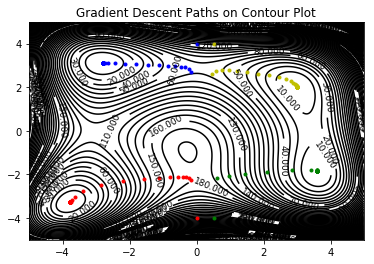

In [6]:
plt.figure()
CS = plt.contour(X, Y, Z, 100,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=10)
#print(p1.shape)
print(p1.shape, p2.shape, p3.shape, p4.shape)
P1 = p1.reshape((len(p1)//2, 2)).transpose()
P2 = p2.reshape((len(p2)//2, 2)).transpose()
P3 = p3.reshape((len(p3)//2, 2)).transpose()
P4 = p4.reshape((len(p4)//2, 2)).transpose()

plt.plot(P1[0], P1[1], 'r.')
plt.plot(P2[0], P2[1], 'g.')
plt.plot(P3[0], P3[1], 'b.')
plt.plot(P4[0], P4[1], 'y.')
plt.title('Gradient Descent Paths on Contour Plot')

In [7]:
from scipy.stats import multivariate_normal

In [8]:
#cov = 2*np.identity(5)
#rv10 = multivariate_normal.pdf(np.arange(5), mean = [-1, 0, 4, 1, 0.5], cov = 2*np.identity(5))
rv = multivariate_normal(mean = [-1, 0, 4, 1, 0.5], cov = 2*np.identity(5))

#np.mean(rv10)
#print(rv10)
#x, y = np.mgrid[-5:5:.01, -5:5:.01]
#pos = np.empty(x.shape + (5,))
#pos[:, :, 0] = x; pos[:, :, 1] = y
#plt.contourf(x, y, rv10.pdf(pos))


Means of the arrays: 
10:  [-1.29035174 -0.71111523  3.78534666  1.01101244  0.82481634]
100:  [-1.25119599 -0.06772116  4.01874498  1.02481419  0.34617159]
1,000:  [-0.9716298  -0.04597909  4.01347083  0.97833319  0.42088311]
10,000:  [-0.97623909 -0.03130083  4.00636265  1.02993097  0.50492742]
100,000:  [-1.00259143e+00 -1.64954460e-03  4.01088142e+00  9.93406696e-01
  4.91526230e-01]
1,000,000:  [-1.00156956e+00 -6.06396804e-04  3.99966643e+00  1.00100690e+00
  4.99688773e-01]
Instantaneous errors: 
10:  0.8612154090589356
100:  0.30383527944072997
1,000:  0.09914303554169394
10,000:  0.05004946166056232
100,000:  0.015592249523580102
1,000,000:  0.0020132564443888505


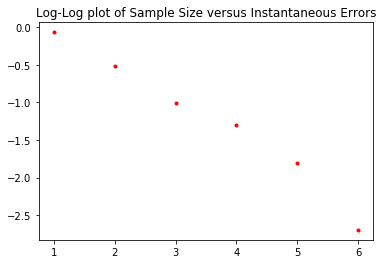

In [9]:
RV10 = rv.rvs(10).transpose()
RV100 = rv.rvs(100).transpose()
RV1_000 = rv.rvs(1000).transpose()
RV10_000 = rv.rvs(10000).transpose()
RV100_000 = rv.rvs(100000).transpose()
RV1_000_000 = rv.rvs(1000000).transpose()

#RVs = [RV10, RV100, RV1_000,m RV10_000, RV100_000, RV1_000_000]

m10 = sum(RV10.transpose()/10)
m100 = sum(RV100.transpose()/100)
m1_000 = sum(RV1_000.transpose()/1000)
m10_000 = sum(RV10_000.transpose()/10000)
m100_000 = sum(RV100_000.transpose()/100000)
m1_000_000 = sum(RV1_000_000.transpose()/1000000)

print("Means of the arrays: ")
print("10: ", m10)
print("100: ", m100)
print("1,000: ", m1_000)
print("10,000: ", m10_000)
print("100,000: ", m100_000)
print("1,000,000: ", m1_000_000)


m = [-1, 0, 4, 1, 0.5]

e10 = np.linalg.norm(m10 - m)
e100 = np.linalg.norm(m100 - m)
e1_000 = np.linalg.norm(m1_000 - m)
e10_000 = np.linalg.norm(m10_000 - m)
e100_000 = np.linalg.norm(m100_000 - m)
e1_000_000 = np.linalg.norm(m1_000_000 - m)

print("Instantaneous errors: ")
print("10: ", e10)
print("100: ", e100)
print("1,000: ", e1_000)
print("10,000: ", e10_000)
print("100,000: ", e100_000)
print("1,000,000: ", e1_000_000)

errors = [e10, e100, e1_000, e10_000, e100_000, e1_000_000]
nums = [10, 100, 1000, 10000, 100000, 1000000]
plt.plot(np.log10(nums), np.log10(errors), 'r.')
plt.title('Log-Log plot of Sample Size versus Instantaneous Errors')
plt.show()